In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Load processed data

X_train = pd.read_csv("~/Projects/Python/Loan_Default_Prediction/Data/X_train.csv")
X_test = pd.read_csv("~/Projects/Python/Loan_Default_Prediction/Data/X_test.csv")
y_train = pd.read_csv("~/Projects/Python/Loan_Default_Prediction/Data/y_train.csv").values.ravel()
y_test = pd.read_csv("~/Projects/Python/Loan_Default_Prediction/Data/y_test.csv").values.ravel()


# Printing dataset shape

print("Training features shape: ", X_train.shape)
print("Testing features shape: ", X_test.shape)

Features used for training: ['ID', 'year', 'loan_limit', 'approv_in_adv', 'Credit_Worthiness', 'open_credit', 'business_or_commercial', 'loan_amount', 'rate_of_interest', 'Interest_rate_spread', 'Upfront_charges', 'term', 'Neg_ammortization', 'interest_only', 'lump_sum_payment', 'property_value', 'construction_type', 'Secured_by', 'income', 'Credit_Score', 'co-applicant_credit_type', 'submission_of_application', 'LTV', 'Security_Type', 'dtir1', 'Gender_Joint', 'Gender_Male', 'Gender_Sex Not Available', 'loan_type_type2', 'loan_type_type3', 'loan_purpose_p2', 'loan_purpose_p3', 'loan_purpose_p4', 'occupancy_type_pr', 'occupancy_type_sr', 'total_units_2U', 'total_units_3U', 'total_units_4U', 'credit_type_CRIF', 'credit_type_EQUI', 'credit_type_EXP', 'age_35-44', 'age_45-54', 'age_55-64', 'age_65-74', 'age_<25', 'age_>74', 'Region_North-East', 'Region_central', 'Region_south']
Training features shape:  (118936, 50)
Testing features shape:  (29734, 50)


Logistic regression Performance: 
Accuracy:  0.8711912288962131
              precision    recall  f1-score   support

           0       0.86      0.99      0.92     22494
           1       0.93      0.51      0.66      7240

    accuracy                           0.87     29734
   macro avg       0.89      0.75      0.79     29734
weighted avg       0.88      0.87      0.86     29734



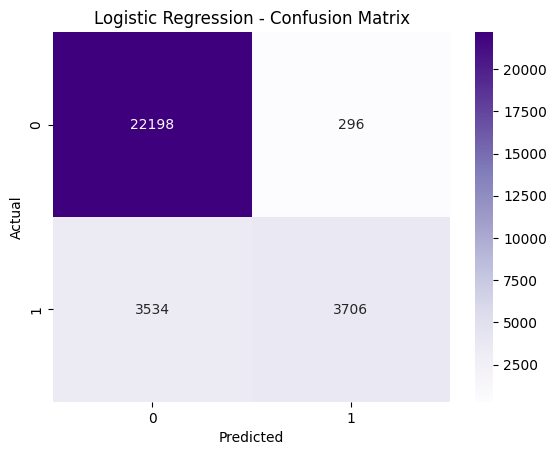

In [3]:
# Train logistic regression model 

log_model = LogisticRegression()
log_model.fit(X_train, y_train)


# Predict on test set

y_pred_log = log_model.predict(X_test)


# Evaluate model performance

print("Logistic regression Performance: ")
print("Accuracy: ", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test,y_pred_log))


# Confusion Matrix

sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt="d", cmap="Purples")
plt.title("Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Decision Tree Performance: 
Accuracy:  0.9999663684670748
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22494
           1       1.00      1.00      1.00      7240

    accuracy                           1.00     29734
   macro avg       1.00      1.00      1.00     29734
weighted avg       1.00      1.00      1.00     29734



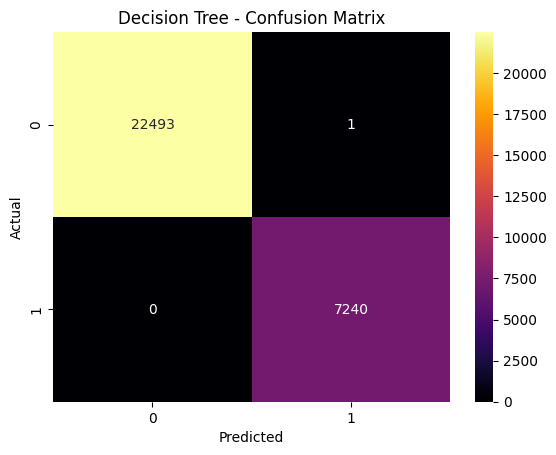

In [4]:
# Train Decision Tree Model

tree_model = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_model.fit(X_train, y_train)


# Predict on test set

y_pred_tree = tree_model.predict(X_test)


# Evaluate Model Performance

print("Decision Tree Performance: ")
print("Accuracy: ", accuracy_score(y_test, y_pred_tree))
print(classification_report(y_test,y_pred_tree))


# Confusion Matrix

sns.heatmap(confusion_matrix(y_test, y_pred_tree), annot=True, fmt="d", cmap="inferno")
plt.title("Decision Tree - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Radom Forest Peformance: 
Accuracy:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22494
           1       1.00      1.00      1.00      7240

    accuracy                           1.00     29734
   macro avg       1.00      1.00      1.00     29734
weighted avg       1.00      1.00      1.00     29734



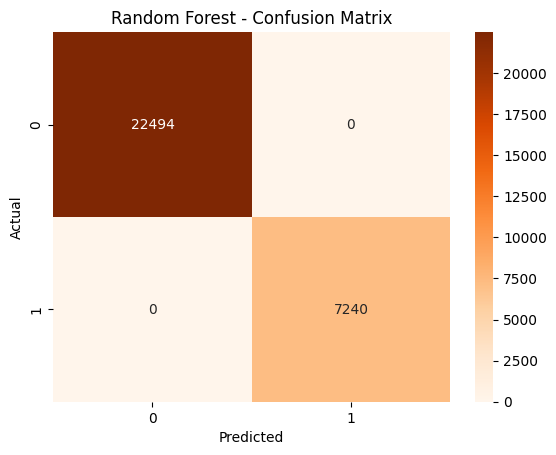

In [5]:
# Train random forest model

rf_model = RandomForestClassifier(n_estimators=100, max_depth=7, random_state=42)
rf_model.fit(X_train, y_train)


# Predict on test set

y_pred_rf = rf_model.predict(X_test)


# Evaluate model performance

print("Radom Forest Peformance: ")
print("Accuracy: ", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


# Confusion Matrix

sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", cmap="Oranges")
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Voting Classifier (Hard) Performance:
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22494
           1       1.00      1.00      1.00      7240

    accuracy                           1.00     29734
   macro avg       1.00      1.00      1.00     29734
weighted avg       1.00      1.00      1.00     29734



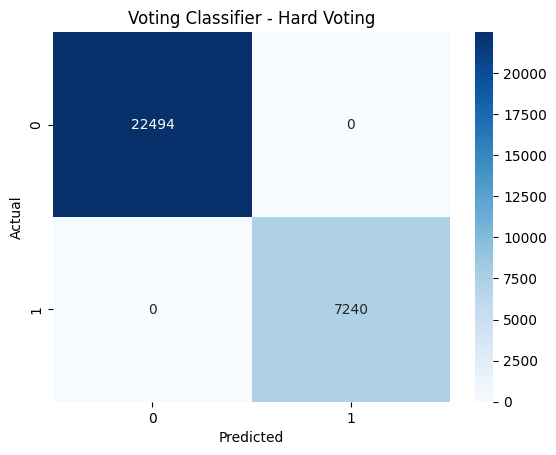

In [6]:
# Hard Voting Classifier (majority rule)

voting_clf_hard = VotingClassifier(
    estimators=[
        ('logistic', log_model),
        ('decision tree', tree_model),
        ('random forest', rf_model)
    ],
    voting='hard'
)
voting_clf_hard.fit(X_train, y_train)


# Predict

y_pred_voting_hard = voting_clf_hard.predict(X_test)


# Evaluate

print("Voting Classifier (Hard) Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_voting_hard))
print(classification_report(y_test, y_pred_voting_hard))


# Confusion Matrix

sns.heatmap(confusion_matrix(y_test, y_pred_voting_hard), annot=True, fmt="d", cmap="Blues")
plt.title("Voting Classifier - Hard Voting")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()        

Voting Classifier (Soft) Performance:
Accuracy: 0.9999663684670748
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22494
           1       1.00      1.00      1.00      7240

    accuracy                           1.00     29734
   macro avg       1.00      1.00      1.00     29734
weighted avg       1.00      1.00      1.00     29734



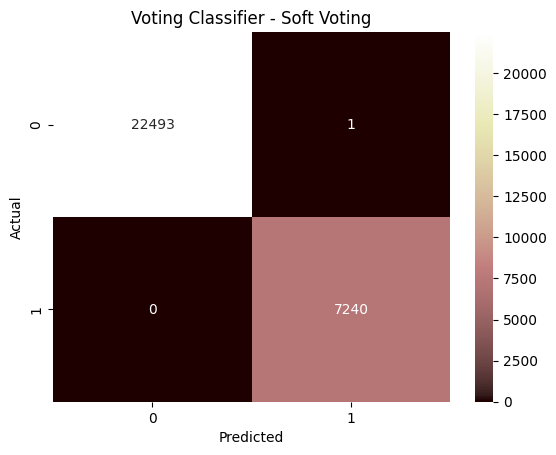

In [7]:
# Soft Voting Classifier (probability averaging)

voting_clf_soft = VotingClassifier(
    estimators=[
        ('logistic', log_model),
        ('decision tree', tree_model),
        ('random forest', rf_model)
    ],
    voting='soft'
)
voting_clf_soft.fit(X_train, y_train)


# Predict

y_pred_voting_soft = voting_clf_soft.predict(X_test)


# Evaluate

print("Voting Classifier (Soft) Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_voting_soft))
print(classification_report(y_test, y_pred_voting_soft))


# Confusion Matrix

sns.heatmap(confusion_matrix(y_test, y_pred_voting_soft), annot=True, fmt="d", cmap="pink")
plt.title("Voting Classifier - Soft Voting")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Gradient Boosting Performance: 
Accuracy:  0.9999663684670748
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22494
           1       1.00      1.00      1.00      7240

    accuracy                           1.00     29734
   macro avg       1.00      1.00      1.00     29734
weighted avg       1.00      1.00      1.00     29734



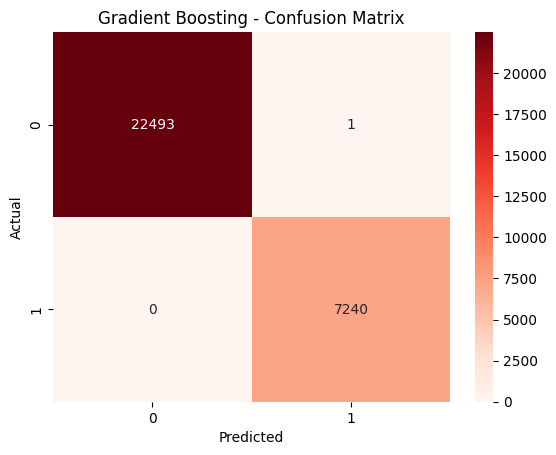

In [8]:
# Train Gradient Boosting Model

gbm_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gbm_model.fit(X_train, y_train)


# Predict

y_pred_gbm = gbm_model.predict(X_test) 


# Evaluate

print("Gradient Boosting Performance: ")
print("Accuracy: ", accuracy_score(y_test, y_pred_gbm))
print(classification_report(y_test, y_pred_gbm))


# Confusion Matrix

sns.heatmap(confusion_matrix(y_test, y_pred_gbm), annot=True, fmt="d", cmap="Reds")
plt.title("Gradient Boosting - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

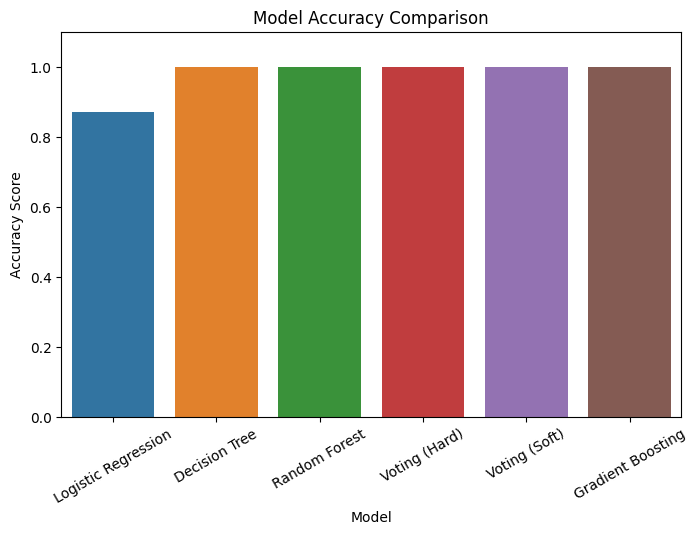

In [9]:
# Store Model Results

models = ["Logistic Regression", "Decision Tree", "Random Forest", "Voting (Hard)", "Voting (Soft)", "Gradient Boosting"]
accuracies = [
    accuracy_score(y_test, y_pred_log),
    accuracy_score(y_test, y_pred_tree),
    accuracy_score(y_test, y_pred_rf),
    accuracy_score(y_test, y_pred_voting_hard),
    accuracy_score(y_test, y_pred_voting_soft),
    accuracy_score(y_test, y_pred_gbm),
]

# Model Accuracy Comparison

plt.figure(figsize=(8,5))
sns.barplot(x=models, y=accuracies, hue=models)
plt.title("Model Accuracy Comparison")
plt.xlabel("Model")
plt.ylabel("Accuracy Score")
plt.xticks(rotation=30)
plt.ylim(0, 1.1)
plt.legend([],[], frameon=False) 
plt.show()    

In [11]:
# Saving the Best Model

joblib.dump(gbm_model, "../models/best_model.pkl")


['../models/best_model.pkl']